<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools </div>
<div style="text-align: right">Final Project-----The analysis of "les-miserables" </div>


<br />
<center>
<img src="ipynb.images/les2.jpg" width=500 />
</center>

# Content:
### Part 1 Characters in this novel
### Part 2 Happy ending or bad ending?
### Part 3 The Story in The Les Miserables



# Part 1 The analysis about character in this novel

In [3]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import networkx as nx 

**Part 1.1** Word frequency about main characters

In [76]:
texts = open('data/les-miserables.txt',"r")
texts = texts.read()
AllChapters = re.split('CHAPTER ',texts)[1:]

In [77]:
AllChapters = pd.DataFrame(AllChapters,columns = ['text'])
AllChapters.head(10)

,text
0,"I--M. MYRIEL\n\nIn 1815, M. Charles-Francois-B..."
1,II--M. MYRIEL BECOMES M. WELCOME\n\n\nThe epis...
2,III--A HARD BISHOPRIC FOR A GOOD BISHOP\n\n\nT...
3,IV--WORKS CORRESPONDING TO WORDS\n\nHis conver...
4,V--MONSEIGNEUR BIENVENU MADE HIS CASSOCKS LAST...
5,VI--WHO GUARDED HIS HOUSE FOR HIM\n\nThe house...
6,VII--CRAVATTE\n\nIt is here that a fact falls ...
7,VIII--PHILOSOPHY AFTER DRINKING\n\nThe senator...
8,IX--THE BROTHER AS DEPICTED BY THE SISTER\n\nI...
9,X--THE BISHOP IN THE PRESENCE OF AN UNKNOWN LI...


**we got main character list from website  https://www.sparknotes.com/lit/lesmis/characters/**

In [5]:
nameall = open('data/character_list.txt','r').read().split(',')
nameall = pd.DataFrame(nameall,columns = ['name'])
nameall

,name
0,Valjean
1,Cosette
2,Javert
3,Fantine
4,Marius Pontmercy
5,M.Myriel
6,Eponine
7,M.Gillenormand
8,Gavroche
9,Georges Pontmercy


In [79]:
textsall = ''.join(AllChapters.text.tolist())
nameall['num'] = nameall.name.apply(lambda x:textsall.count(x))
nameall = nameall.sort_values('num',ascending = False)
nameall.head(10)

,name,num
0,Valjean,1106
1,Cosette,1004
20,Thenardier,584
2,Javert,453
8,Gavroche,301
11,Fauchelevent,289
10,Enjolras,250
3,Fantine,203
22,Courfeyrac,183
12,Montparnasse,88


<IPython.core.display.Javascript object>


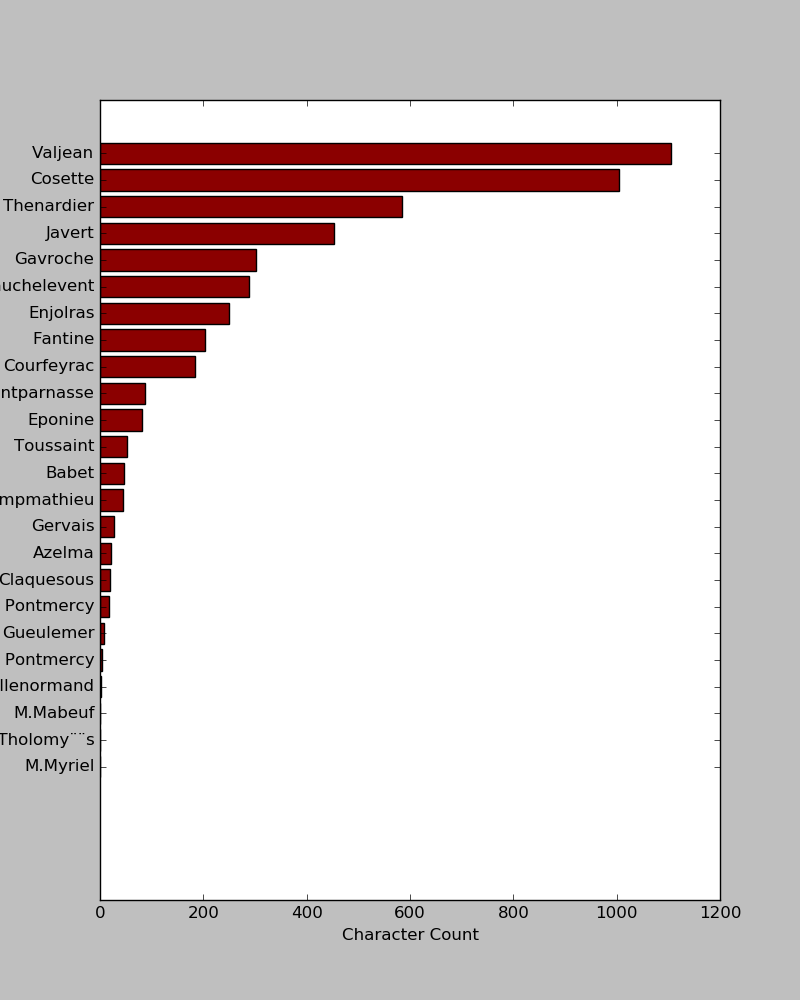

In [80]:
plt.figure(figsize=(8,10))
fig = plt.axes()
n = 50
plt.barh(range(len(nameall.num[:n][::-1])),nameall.num[:n][::-1],color = 'darkred')
fig.set_yticks(np.arange(len(nameall.name[:n][::-1])))
fig.set_yticklabels(nameall.name[:n][::-1])
plt.xlabel('Character Count')
plt.show()

The top 3 of most frequency characher is **Valjean**,**Cosette**,**Theanardier**

<br />
<left>
<img src="ipynb.images/valjean and cos.jpg" width=400 />
</left> 

**Part 1.2** the connection between different characters

In [81]:
import networkx as nx 
import sklearn as sk 
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib notebook

Create graph from txt file

In [82]:
G_df = pd.read_csv('data/lemis_data.csv')
G_df.head(10)

,source_name,source_group,target_name,target_group,value
0,Napoleon,1,Myriel,1,1
1,Mlle.Baptistine,1,Myriel,1,8
2,Mme.Magloire,1,Myriel,1,10
3,Mme.Magloire,1,Mlle.Baptistine,1,6
4,CountessdeLo,1,Myriel,1,1
5,Geborand,1,Myriel,1,1
6,Champtercier,1,Myriel,1,1
7,Cravatte,1,Myriel,1,1
8,Count,1,Myriel,1,2
9,OldMan,1,Myriel,1,1


In [83]:
G_df.columns

Index(['source_name', 'source_group', 'target_name', 'target_group', 'value'], dtype='object')

<IPython.core.display.Javascript object>


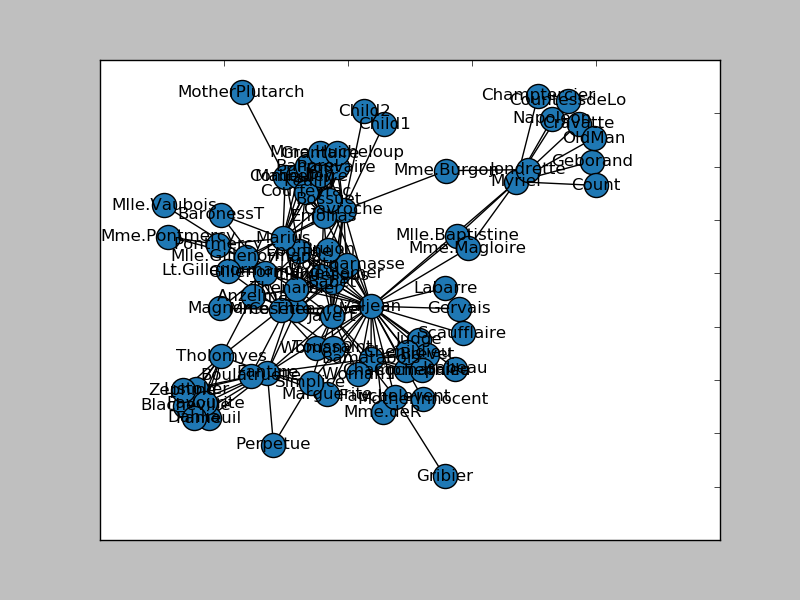

C:\Users\yangj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [84]:
G_df = G_df[['source_name','target_name','value']]
G = nx.from_pandas_edgelist(G_df, 'source_name', 'target_name', edge_attr='value') 
nx.draw_networkx(G) 

In [85]:
print(nx.info(G)) 

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


In [87]:
import networkx as nx
# Creating an empty graph object
G_book = nx.Graph()

In [88]:
# Iterating through the DataFrame to add edges
for _,edge in G_df.iterrows():
    G_book.add_edge(edge['source_name'], edge['target_name'], weight=edge['value'])

deg_cen_book = nx.degree_centrality(G_book)
G_book

In [89]:
sorted_deg_cen_book = sorted(deg_cen_book.items(), key=lambda x:x[1], reverse=True)[0:10]
print('Degree Centrality:')
sorted_deg_cen_book

Degree Centrality:


[('Valjean', 0.47368421052631576),
 ('Gavroche', 0.2894736842105263),
 ('Marius', 0.25),
 ('Javert', 0.22368421052631576),
 ('Thenardier', 0.21052631578947367),
 ('Fantine', 0.19736842105263158),
 ('Enjolras', 0.19736842105263158),
 ('Courfeyrac', 0.17105263157894735),
 ('Bossuet', 0.17105263157894735),
 ('Bahorel', 0.15789473684210525)]

<IPython.core.display.Javascript object>


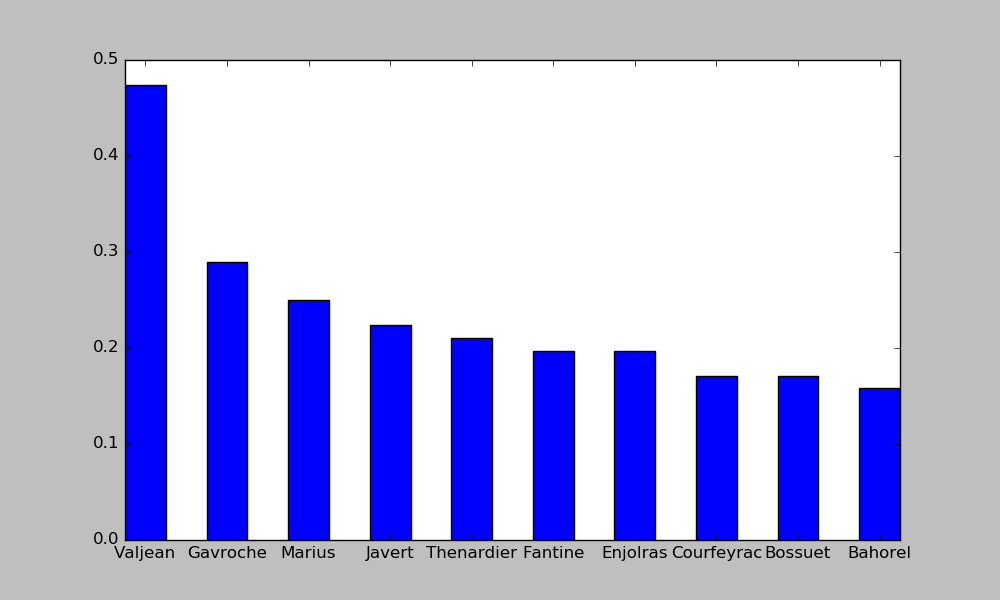

In [90]:
import matplotlib.pyplot as plt
plt.style.use('classic')
top_charcter_book = []
deg_cen_book = []
for num in range(0,10): 
    name = sorted_deg_cen_book[num][0]
    deg_cen = sorted_deg_cen_book[num][1]
    top_charcter_book.append(name)
    deg_cen_book.append(deg_cen)

plt.figure(figsize=(10, 6)) 

plt.bar(top_charcter_book , deg_cen_book, width=0.5)
plt.savefig('top_charcter_book.png')
plt.show()

**Valjean** is the most important node,the Degree Centrality is 0.47

<br />
<center>
<img src="ipynb.images/valjean.jpg" width=400 />
</center>

###  Similar way to figure out leading role

In [1]:
import networkx as nx
lesmis = nx.read_gml('data/lesmis/lesmis.gml')

In [2]:
import matplotlib as pl
nx.draw(lesmis,pos=nx.spring_layout(lesmis))

/Users/llm/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


{'Myriel': Text(-0.6691647922343826, -0.34811753099041093, 'Myriel'),
 'Napoleon': Text(-0.8308108930537027, -0.6156789975821987, 'Napoleon'),
 'MlleBaptistine': Text(-0.42849903288103397, -0.23010168643321652, 'MlleBaptistine'),
 'MmeMagloire': Text(-0.46704038196971337, -0.1807193302443029, 'MmeMagloire'),
 'CountessDeLo': Text(-0.8532713204738278, -0.5374001341346409, 'CountessDeLo'),
 'Geborand': Text(-0.9511375459200935, -0.3193384671109405, 'Geborand'),
 'Champtercier': Text(-0.9404382684453547, -0.5230319965442117, 'Champtercier'),
 'Cravatte': Text(-0.8931089999174737, -0.43655453657843896, 'Cravatte'),
 'Count': Text(-0.7414305907769334, -0.61230893894267, 'Count'),
 'OldMan': Text(-0.9748841676488149, -0.4123428336814273, 'OldMan'),
 'Labarre': Text(0.01713934024239434, 0.09549785794980646, 'Labarre'),
 'Valjean': Text(-0.1208333879963154, 0.034691471051188555, 'Valjean'),
 'Marguerite': Text(0.04899486852345744, 0.2549689752001211, 'Marguerite'),
 'MmeDeR': Text(-0.325816610

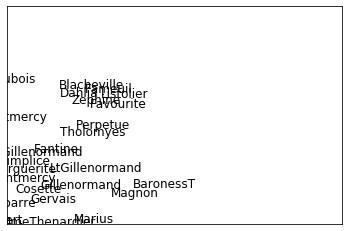

In [3]:
nx.draw_networkx_labels(lesmis,pos=nx.spring_layout(lesmis))

In [4]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg

species = np.array(list(lesmis.nodes()))  # array for multi-indexing
Adj = nx.to_scipy_sparse_matrix(lesmis, dtype=np.float64)

In [5]:
species

array(['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire',
       'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count',
       'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau',
       'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville',
       'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier',
       'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois',
       'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge',
       'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy',
       'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent',
       'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand',
       'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois',
       'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras',
       'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel',
       'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer',
       'Babet', 'C

In [6]:
import pandas as pd
pd.DataFrame(species[:20]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Myriel,Napoleon,MlleBaptistine,MmeMagloire,CountessDeLo,Geborand,Champtercier,Cravatte,Count,OldMan,Labarre,Valjean,Marguerite,MmeDeR,Isabeau,Gervais,Tholomyes,Listolier,Fameuil,Blacheville


In [7]:
n = len(species)
n

77

In [8]:
Adj.todense()

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
pd.DataFrame(Adj.todense())

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()
Deginv

<77x77 sparse matrix of type '<class 'numpy.float64'>'
	with 77 stored elements in Compressed Sparse Row format>

In [11]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

/Users/llm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

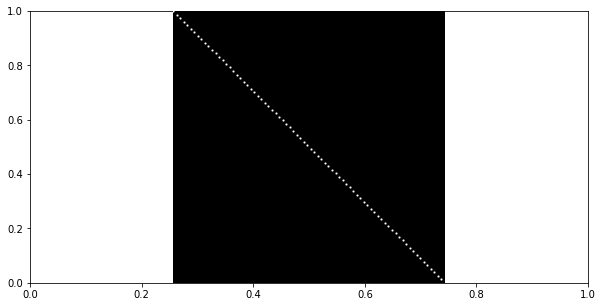

In [12]:
m = sparse.diags(1 / degrees).tocoo()
ax = plot_coo_matrix(m)
ax.figure.show()

/Users/llm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

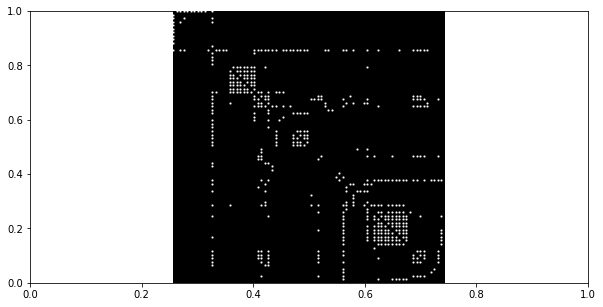

In [13]:
A = Adj.tocoo()
ax = plot_coo_matrix(A)
ax.figure.show()

In [14]:
dense = Adj.todense()
#for x in np.nditer(dense, order='K'):
#    print (int(x)),

#for row in dense[0]:
#    numbers =[ np.vectorize(np.int)(x) for x in row ]
#''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '')

# ok this was way too tough!
for i in range(48):
    for row in dense[i]:
        numbers =[ np.vectorize(np.int)(x) for x in row ]
        degrees = np.sum(numbers)
        print(''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '') + ' ' + str(degrees))

[[01111111110100000000000000000000000000000000000000000000000000000000000000000]] 10
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10010000000100000000000000000000000000000000000000000000000000000000000000000]] 3
[[10100000000100000000000000000000000000000000000000000000000000000000000000000]] 3
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[00000000000100000000000000000000000000000000000000000000000000000000000000000]] 1
[[1011000000101111000000011111110111111110000110001101000100100000100011111

In [15]:
Trans = (Deginv @ Adj).T
Trans

<77x77 sparse matrix of type '<class 'numpy.float64'>'
	with 508 stored elements in Compressed Sparse Column format>

In [16]:
dTrans = Trans.T.todense()
dTrans[0]

matrix([[0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0.1, 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [17]:
from scipy.sparse.linalg import spsolve

damping = 0.85
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

pagerank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

In [18]:
in_degrees = np.ravel(Adj.sum(axis=0))

In [19]:
import pandas as pd
for i, (s, d, p) in enumerate(zip(species, in_degrees, pagerank)):
    print(i, s, '(' + str(d) + ')', p)

0 Myriel (10.0) 0.042779281022712105
1 Napoleon (1.0) 0.005584290834982478
2 MlleBaptistine (3.0) 0.010277134629737837
3 MmeMagloire (3.0) 0.010277134629737837
4 CountessDeLo (1.0) 0.005584290834982478
5 Geborand (1.0) 0.005584290834982478
6 Champtercier (1.0) 0.005584290834982478
7 Cravatte (1.0) 0.005584290834982478
8 Count (1.0) 0.005584290834982478
9 OldMan (1.0) 0.005584290834982478
10 Labarre (1.0) 0.003729040931048254
11 Valjean (36.0) 0.07543012163278472
12 Marguerite (2.0) 0.005260327543023242
13 MmeDeR (1.0) 0.0037290409310482536
14 Isabeau (1.0) 0.003729040931048254
15 Gervais (1.0) 0.0037290409310482553
16 Tholomyes (9.0) 0.01564742736848246
17 Listolier (7.0) 0.012618202914107778
18 Fameuil (7.0) 0.01261820291410778
19 Blacheville (7.0) 0.01261820291410778
20 Favourite (7.0) 0.01261820291410778
21 Dahlia (7.0) 0.012618202914107778
22 Zephine (7.0) 0.01261820291410778
23 Fantine (15.0) 0.027022704917205684
24 MmeThenardier (11.0) 0.019501134691061097
25 Thenardier (16.0) 0.

In [20]:
def pagerank_plot(in_degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against in-degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.835, 0.369, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)

    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degrees) * 1.1)
    ax.set_ylabel('PageRank')
    ax.set_xlabel('In-degree ')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


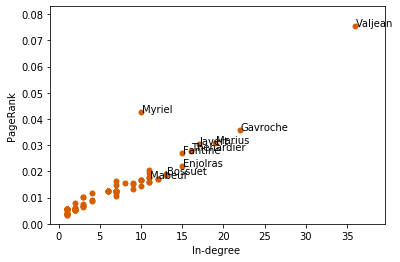

In [21]:
interesting = ['Valjean', 'Javert','Myriel', 'Fantine', 'Gavroche',
               'Marius', 'Mabeuf', 'Enjolras', 'Bossuet',
               'Thenardier']

pagerank_plot(in_degrees, pagerank, species, annotations=interesting)

In [22]:
def power(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    r0 = np.full(n, 1/n)
    r = r0
    for _iter_num in range(max_iter):
        rnext = damping * M @ r + (1 - damping) / n
        if np.allclose(rnext, r):
            break
        r = rnext
    return r

In [23]:
rows = 0
for i in range(77):
    if (np.sum((Trans.todense().T)[i]) != 1.):
        rows += 1
print("non stochastic rows: " + str(rows))

non stochastic rows: 7


In [24]:
def power2(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    dangling = (1/n) * np.ravel(M.sum(axis=0) == 0)
    r0 = np.full(n, 1/n)
    r = r0
    for _ in range(max_iter):
        rnext = (damping * (M @ r + dangling @ r) +
                 (1 - damping) / n)
        if np.allclose(rnext, r):
            return rnext
        else:
            r = rnext
    return r

In [25]:
pagerank_power = power(Trans)
pagerank_power2 = power2(Trans)
np.corrcoef([pagerank, pagerank_power, pagerank_power2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [26]:
for i, (s, pr, prp, prp2) in enumerate(zip(species, pagerank, pagerank_power, pagerank_power2)):
    print(i, s, pr, prp, prp2, prp/prp2)

0 Myriel 0.042779281022712105 0.04277952082166283 0.042779778273198336 0.9999939819338506
1 Napoleon 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
2 MlleBaptistine 0.010277134629737837 0.010277236946115112 0.010277188158781021 1.0000047471480853
3 MmeMagloire 0.010277134629737837 0.010277236946115112 0.010277188158781021 1.0000047471480853
4 CountessDeLo 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
5 Geborand 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
6 Champtercier 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
7 Cravatte 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
8 Count 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
9 OldMan 0.005584290834982478 0.005584363963505779 0.005584311217893287 1.000009445321085
10 Labarre 0.003729040931048254 0.003729045269846497 0.0037290450875

**the most important nodes is Valjean, and the pageRank of Valjean is 0.075. (he is the leading character in this book)**

# Part 2  What happened in this story?  Happy ending or  bad ending?

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba

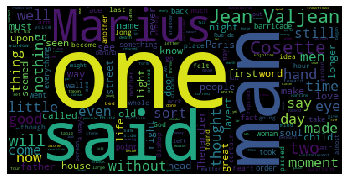

In [4]:
text_from_file_with_apath = open('data/les-miserables.txt').read()

wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)

my_wordcloud = WordCloud().generate(wl_space_split)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

not a good one, start text cleaning

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [6]:
stop_words = nltk.corpus.stopwords.words('english')

word_tokens = word_tokenize(text_from_file_with_apath) 
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

In [7]:
len(word_tokens)

683429

In [8]:
len(filtered_sentence)

418589

In [9]:
import re
new_filtered_sentence = re.split(r'\W+', " ".join(filtered_sentence))
len(new_filtered_sentence)

313198

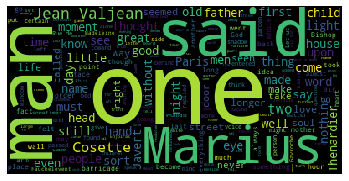

In [10]:
wl_space_split = " ".join(new_filtered_sentence)

my_wordcloud = WordCloud().generate(wl_space_split)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

**Marius, Jean Valjean, Cosetto are main characters, but we still don't know what happened. Let's start using unsupervised method to find out 5 topics.**

bag of words matrix

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(new_filtered_sentence)
X

<313198x22798 sparse matrix of type '<class 'numpy.int64'>'
	with 244016 stored elements in Compressed Sparse Row format>

TF-IDF weighting

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [13]:
X_weighted = tfidf.fit_transform(X)
X_weighted.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=5).fit(X_weighted)

feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print('Topic #%d:' % topic_idx)
    print(' '.join([feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]))
    print('')

Topic #0:
man cosette little like old good time day rue father men say moment come hand thenardier eyes great know thought

Topic #1:
said like day good hand eyes moment thenardier know great door child head place night woman right life paris took

Topic #2:
marius like day good rue say come hand eyes know thought door child head people sort light place night right

Topic #3:
jean cosette little old time men say father moment come thought great javert let house sort night woman longer life

Topic #4:
valjean like day rue thenardier hand eyes door head thought light way right place life saint took chapter seen monsieur



**It seems like "cosette", "marius" is always exist with "old", "good", "day", "time", maybe it is a happy ending story, let's see the sentiment analysis.**

In [15]:
from textblob import TextBlob
import matplotlib.pyplot as plt

In [16]:
AllChapters = re.split('CHAPTER ',text_from_file_with_apath)[1:]
sentiment_value = []
sentiment_position = []
x = 0
for chapter in AllChapters:
    x += 1
    #utilize TextBlob for NLP
    blob = TextBlob(chapter)
    sentiment_value.append(blob.sentiment.polarity)
    sentiment_position.append(x)

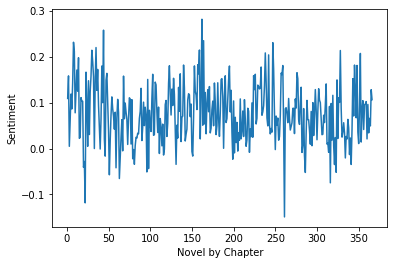

In [17]:
plt.plot(sentiment_position, sentiment_value)
plt.xlabel('Novel by Chapter')
plt.ylabel('Sentiment')
plt.show()

In [18]:
import numpy as np
np.mean(sentiment_value)

0.07623538929438882

In [19]:
np.std(sentiment_value)

0.06421398318530643

**from the picture, we can see in the beginnin of the novel and around 250 chapter, there are some tragedies happend，but the mean of the whole novel's sentiment value is positive, maybe the novel is not so much like what its name called —— ”Miserables".**

 # Part 3 The Story in The Les Miserables

**The Les Miserables was a great book that contains many characters and stories. 
Do you feel that it's difficult to remeber the sories?No problem, We make the summary!**

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches

In [29]:
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["axes.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["figure.figsize"] = [16., 6.]

In [30]:
df = pd.read_csv('data/book_events.csv')

## Event: The sorty in the book year: The year that this event happened 
**Role1: The role who make actions in this event**

**Role2: The role who was treated in this event**

**Event_type: The role's action was kind,ordinary or evil?**

**Relationship: The realtionship bewteen role1 and role2 was close,ordinary or hostile?**

**Main_story: Did the event was related the main story line?**

**Location: The place this event happened**

In [32]:
df.loc[:, "sum_role2"] = (1 - df[["role2"]].isnull().sum(axis = 1))

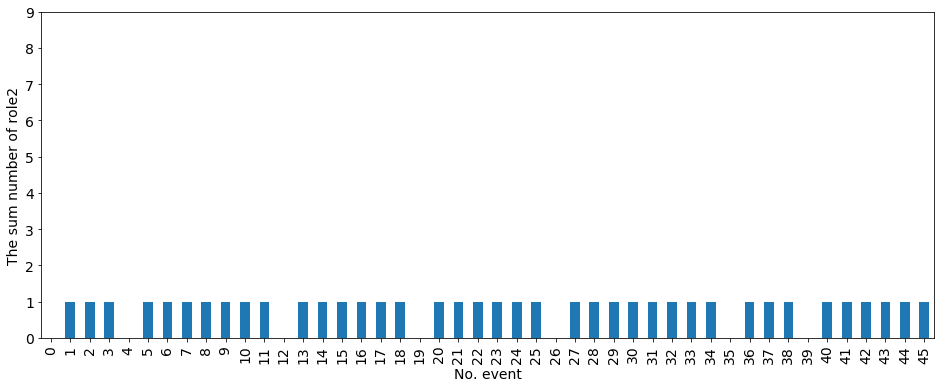

In [33]:
p=df.loc[:, "sum_role2"]
q= p.plot.bar().set(xlabel = "No. event", ylabel = "The sum number of role2", ylim = (0, 9))

In [34]:
df.head(46)

,event,year,role1,role2,event_type,relationship,main_story,location,chapter,sum_role2
0,Bread,1796,Jean,NaN,unkind,NaN,0,Digne,1,0
1,Silver,1815,Jean,Myriel,unkind,close,0,Digne,1,1
2,Forgive,1815,Myriel,Jean,kind,close,0,Digne,1,1
3,Threat,1815,Jean,Pettit,unkind,ordinary,0,Digne,1,1
4,Repent,1815,Jean,NaN,kind,NaN,0,Digne,1,0
5,Help,1821,Jean,Cutwind,kind,close,0,Montreuil,1,1
6,New daughter,1817,Fantine,Cosette,kind,close,0,Paris,1,1
7,Put her daughter in a local family,1821,Fantine,Thenardier,ordinary,ordinary,1,Montreuil,1,1
8,Mistreatment,1821,Thenardier,Cosette,unkind,ordinary,1,Montreuil,1,1
9,Tell lies and ask for many things,1821,Thenardier,Fantine,unkind,ordinary,1,Montreuil,1,1


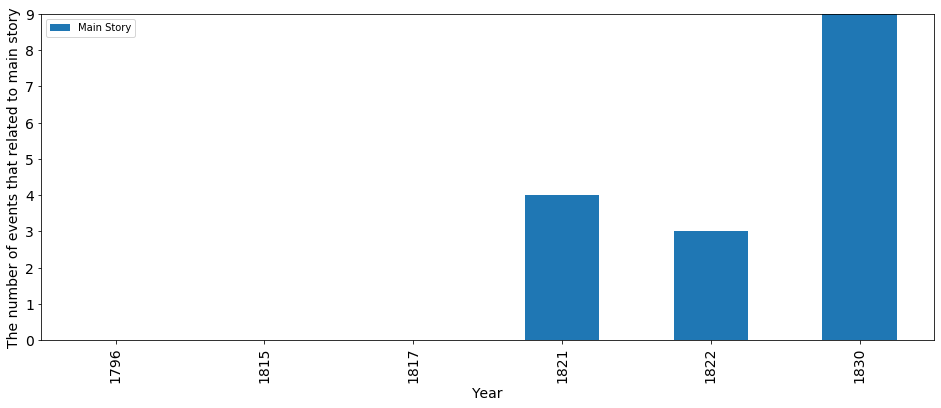

In [35]:
p = df.groupby('year').sum()[["main_story"]].plot.bar()
q= p.set(xlabel = "Year", ylabel = "The number of events that related to main story", ylim = (0, 9)), p.legend(["Main Story"])

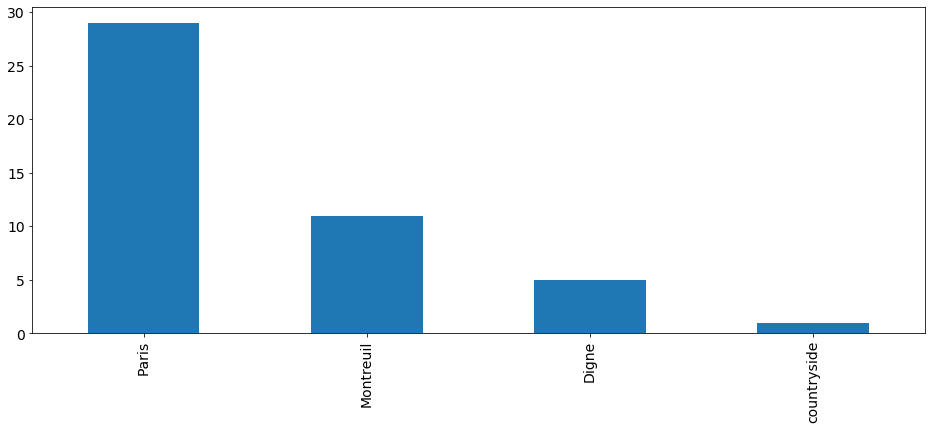

In [36]:
# Count the number of observations for each value, then make a bar plot
df['location'].value_counts().plot(kind='bar')

C:\Users\yangj\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


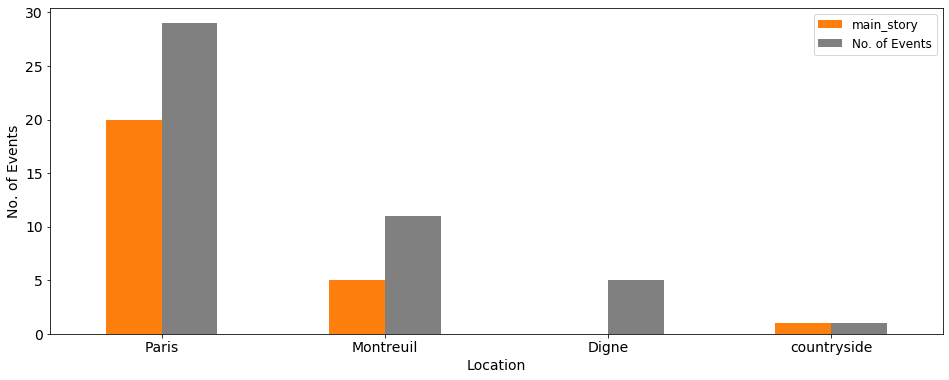

In [37]:
data = df.groupby("location").sum()[["main_story"]]
p = pd.concat([data, df.location.value_counts().to_frame()], axis = 1).sort_values("location", ascending = False).copy(deep = True).plot.bar(color = [sns.color_palette()[1], "grey", "darkblue"], rot = 0)
_ = p.set(xlabel = "Location", ylabel = "No. of Events"), p.legend(["main_story", "No. of Events"], fontsize = 12.)

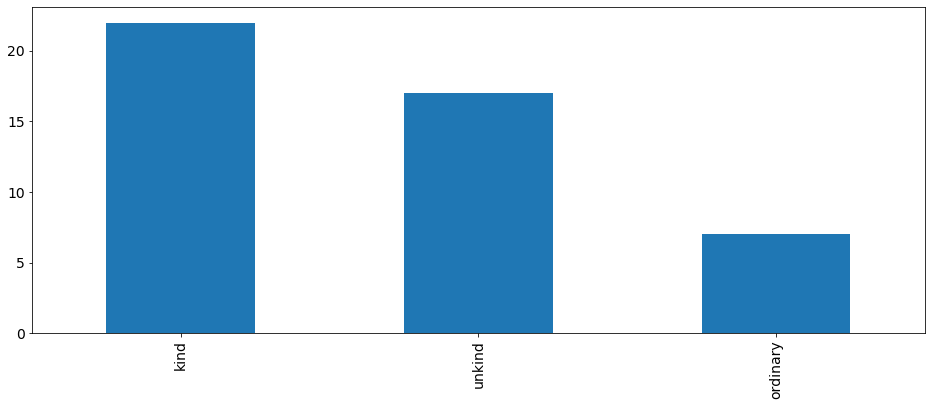

In [38]:
# Count the number of observations for each value, then make a bar plot
df['event_type'].value_counts().plot(kind='bar')

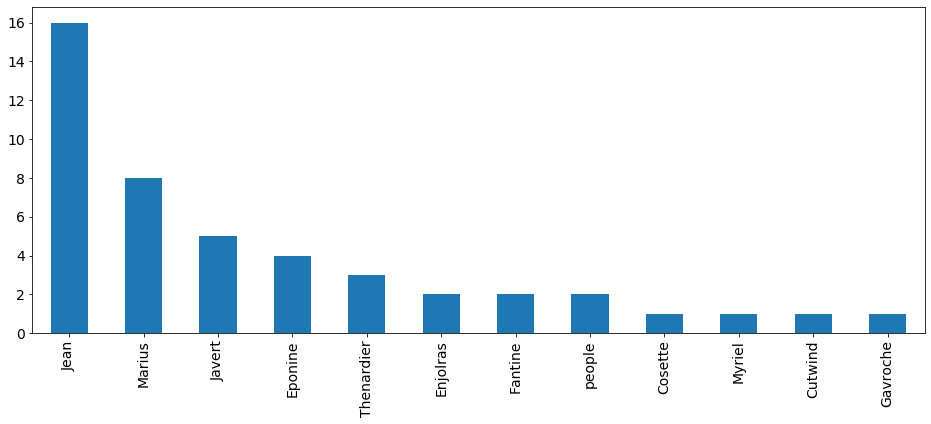

In [39]:
# Count the number of observations for each value, then make a bar plot
df['role1'].value_counts().plot(kind='bar')

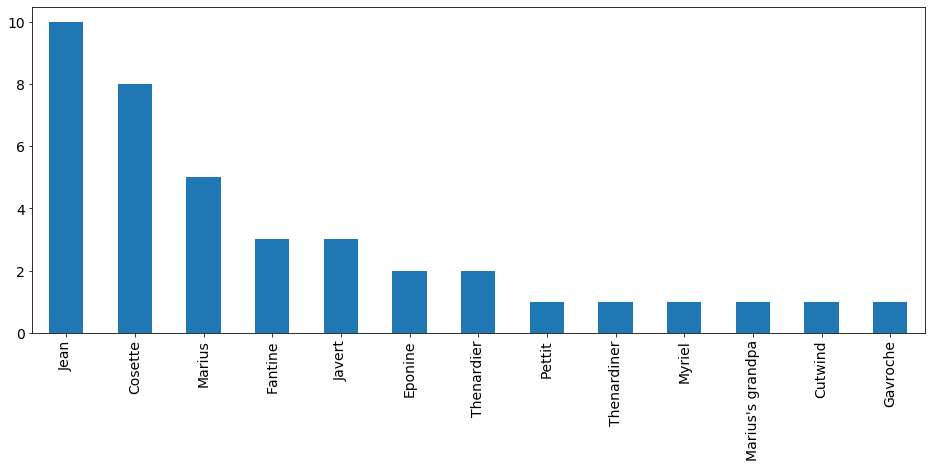

In [40]:
df['role2'].value_counts().plot(kind='bar')

# In this book
**1. Who did the most kind things?**

**2. Who did the most unkind things?**

**3. Who was treated kindly for a lot of times?**

**4. Who was treated unkindly for a lot of times？**

In [41]:
## Use Dictionary of Python

In [42]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)
role1_list = []
# For each row in df.role1,
for row in df['role1']:
    # if the cell is a string,
    if type(row) == str:
        # split up the names by the comma, 
        #and attach it to role1 list,
       role1_list.append(row.split(','))
    # otherwise,     
    else:
        # do nothing
        continue

role2_list = []
        
# For each row in df.role2,
for row in df['role2']:
    # if the cell is a string,
    if type(row) == str:
        # split up the names by the comma, 
        #and attach it to role2 list,
       role2_list.append(row.split(','))
    # otherwise
    else:
        # do nothing
        role2_list.append('')

In [43]:
# Create a list of roles
role = []

# For each list in role1_list,
for row in role1_list:
    # and each list in that list
    for element in row:
        # strip of any leading blank space 
        # and append it to the role list
        role.append(element.lstrip())

# For each list in role2_list,
for row in role2_list:
    # and each list in that list
    for element in row:
        # strip of any leading blank space 
        # and append it to the role list
        role.append(element.lstrip())
roles = list(set(role))

In [44]:
#  Count the number of times a role make kind actions

# Create a list
role1_kind = []

# for each role:
for row in roles:
    # create a score variable, then
    score = 0
    # go through each cell of role1 where the role1 make kind actions:
    for x in df['role1'][df['event_type'] == 'kind']:
        # if the cell is a string
        if type(x) == str:
            # and if the role is in the cell
            if row in x:
                # add one to score
                score = score + 1
            # if not
            else:
                # add 0 to score
                score = score + 0
        # if the cell is not a string        
        else:
            # do nothing
            continue
    # append the score to the list
    role1_kind.append(score)

In [45]:
#  Count the number of times a role make unkind actions

# Create a list
role1_unkind = []

# for each role:
for row in roles:
    # create a score variable
    score = 0
    for x in df['role1'][df['event_type'] == 'unkind']:
        # if the cell is a string
        if type(x) == str:
            if row in x:
                # add one to score
                score = score + 1
            # if not
            else:
                # add 0 to score
                score = score + 0
        # if the cell is not a string        
        else:
            # do nothing
            continue
    # append the score to the list
    role1_unkind.append(score)

In [46]:
#  Count the number of times a role make was treated kindly
# Create a list
role2_kind = []

# for each role:
for row in roles:
    # create a score variable
    score = 0
    for x in df['role2'][df['event_type'] == 'kind']:
        # if the cell is a string
        if type(x) == str:
            if row in x:
                # add one to score
                score = score + 1
            # if not
            else:
                # add 0 to score
                score = score + 0
        # if the cell is not a string        
        else:
            # do nothing
            continue   
    # append the score to the list
    role2_kind.append(score)

In [47]:
#  Count the number of times a role was treated unkindly

# Create a list
role2_unkind = []
# for each role:
for row in roles:
    # create a score variable
    score = 0
    for x in df['role2'][df['event_type'] == 'unkind']:
        # if the cell is a string
        if type(x) == str:
            if row in x:
                # add one to score
                score = score + 1
            # if not
            else:
                # add 0 to score
                score = score + 0
        # if the cell is not a string        
        else:
            # do nothing
            continue
    # append the score to the list
    role2_unkind.append(score)

In [48]:
columns = {'role1_kind':  role1_kind, 
           'role1_unkind': role1_unkind,
           'role2_kind': role2_kind,
           'role2_unkind': role1_unkind}

thing= pd.DataFrame(columns, index=roles)

In [49]:
thing['total_things'] = thing['role1_kind'] + thing['role2_unkind'] + thing['role2_kind'] + thing['role2_unkind']
thing.sort_values('total_things', ascending=False).head(5)['total_things']

Jean          21
Marius        12
Javert        10
Cosette        7
Thenardier     6
Name: total_things, dtype: int64

In [50]:
thing['total_kinds'] = thing['role1_kind'] + thing['role2_kind']
thing.sort_values('total_kinds', ascending=False).head(5)['total_kinds']

Jean       15
Marius      8
Cosette     7
Eponine     4
Fantine     2
Name: total_kinds, dtype: int64

In [51]:
thing['kind_percentage'] = thing['total_kinds'] / thing['total_things'] * 100
thing.sort_values('kind_percentage', ascending=False).head(75)['kind_percentage'][thing['kind_percentage'] != float('Inf')]

Fantine             100.000000
Cutwind             100.000000
Cosette             100.000000
Myriel              100.000000
Jean                 71.428571
Marius               66.666667
Eponine              66.666667
Javert               20.000000
Gavroche              0.000000
Thenardier            0.000000
people                0.000000
Enjolras              0.000000
Marius's grandpa           NaN
Thenardiner                NaN
Pettit                     NaN
Name: kind_percentage, dtype: float64

In [52]:
thing['part'] = (thing['role1_kind'] + thing['role2_kind']) - (thing['role1_unkind'] + thing['role2_unkind'])
thing.sort_values('part', ascending=False).head(3)['part']

Jean       9
Cosette    7
Marius     4
Name: part, dtype: int64

**Which pair has the most actions?**

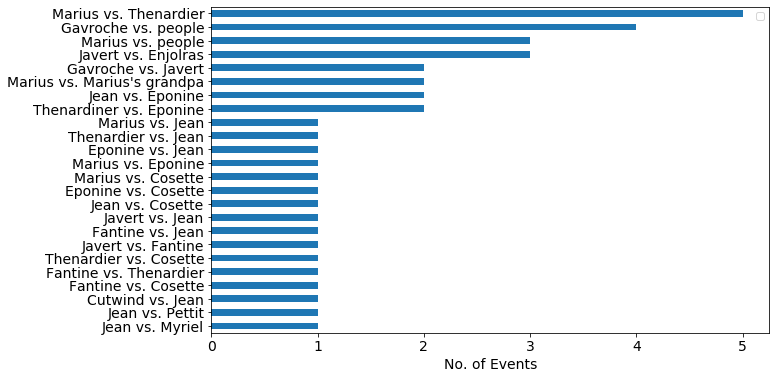

In [55]:
c = list(Counter([tuple(set(x)) for x in df.dropna(subset = ["role1", "role2"])[["role1", "role2"]].values if len(set(x)) > 1]).items())
p = pd.DataFrame(c).sort_values(1).plot.barh(figsize = (10, 6))
_ = p.set(yticklabels = ["%s vs. %s" % (x[0], x[1]) for x in list(zip(*c))[0]], xlabel = "No. of Events"), p.legend("")

In [56]:
person = list(df.role1.append(df.role2).fillna("Unknown").unique())
event_types = list(df.event_type.fillna("Unknown").str.title().unique())

def example_data():
    data = df[["event_type", "role1", "role2", "event"]].copy(deep = True).fillna("Unknown")
    data.loc[:, "event_type"] = data.event_type.fillna("Unknown").str.title()
    grouped, ret_data = data.groupby(["role1", "event_type"]).count()[["event"]], [event_types]
    ret_data.append(("As role1", [[grouped.loc[(person[j], event_types[i])].values[0]
                                    if (person[j], event_types[i]) in grouped.index else 0
                                    for i in range(len(event_types))] for j in range(len(person))]))
    grouped = data.groupby(["role2", "event_type"]).count()[["event"]]
    ret_data.append(("As role2", [[grouped.loc[(person[j], event_types[i])].values[0]
                                    if (person[j], event_types[i]) in grouped.index else 0
                                    for i in range(len(event_types))] for j in range(len(person))]))
    return ret_data

example_data()

[['Unkind', 'Kind', 'Ordinary'],
 ('As role1',
  [[3, 10, 3],
   [0, 1, 0],
   [0, 1, 1],
   [3, 0, 0],
   [4, 1, 0],
   [1, 2, 1],
   [0, 1, 0],
   [1, 0, 1],
   [2, 5, 1],
   [0, 1, 0],
   [1, 0, 0],
   [2, 0, 0],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0],
   [0, 0, 0]]),
 ('As role2',
  [[5, 5, 0],
   [1, 0, 0],
   [2, 1, 0],
   [0, 0, 2],
   [2, 1, 0],
   [0, 2, 0],
   [0, 1, 0],
   [0, 0, 0],
   [1, 3, 1],
   [2, 6, 0],
   [1, 0, 0],
   [0, 0, 0],
   [1, 3, 3],
   [1, 0, 0],
   [0, 0, 1],
   [1, 0, 0]])]